<a href="https://colab.research.google.com/github/retolador/machine_learning_retolador/blob/master/Fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

shion-MNIST collection of small images of clothing, such as t-shirts, sandals, sneakers and so on. This notebook make to predict the collection

1. create the model
2. Evaluate the model

In [2]:
%tensorflow_version 2.x  #Importing libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  #Importing libraries`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
# Loading data
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

orig_test = x_test

4423680/4422102 [==============================] - 0s 0us/step


First of all see what we have to classify

In [4]:
print("Length of trainning: {}".format(len(x_train)))
print("Length of testing: {}".format(len(x_test)))

Length of trainning: 60000
Length of testing: 10000


In [5]:
#How many classes have to classify:
len(np.unique(y_test))

10

In [6]:
#Put the number of labels
# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

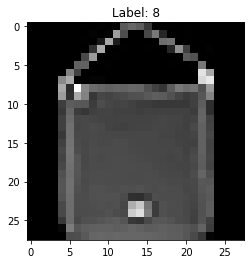

In [7]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap= 'gray')
plt.title('Label: %d' % y_test[index])
plt.show()

In [8]:
#Get image dimensions
len(orig_test[0])

28

In [9]:
#Put image dimensions
img_rows, img_cols = 28, 28

Data preparation

In [10]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Creation of the model:


In [35]:
# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 24

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.7

In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)              

Training the model

Epoch 1/24
469/469 [==============================] - 4s 9ms/step - loss: 0.8922 - accuracy: 0.6914 - val_loss: 0.3652 - val_accuracy: 0.8682
Epoch 2/24
469/469 [==============================] - 4s 8ms/step - loss: 0.4502 - accuracy: 0.8414 - val_loss: 0.3144 - val_accuracy: 0.8876
Epoch 3/24
469/469 [==============================] - 4s 8ms/step - loss: 0.3886 - accuracy: 0.8635 - val_loss: 0.2816 - val_accuracy: 0.9020
Epoch 4/24
469/469 [==============================] - 4s 8ms/step - loss: 0.3512 - accuracy: 0.8747 - val_loss: 0.2643 - val_accuracy: 0.9047
Epoch 5/24
469/469 [==============================] - 4s 8ms/step - loss: 0.3190 - accuracy: 0.8852 - val_loss: 0.2468 - val_accuracy: 0.9117
Epoch 6/24
469/469 [==============================] - 4s 8ms/step - loss: 0.3030 - accuracy: 0.8927 - val_loss: 0.2472 - val_accuracy: 0.9099
Epoch 7/24
469/469 [==============================] - 4s 8ms/step - loss: 0.2795 - accuracy: 0.8989 - val_loss: 0.2386 - val_accuracy: 0.9158
Epoch 

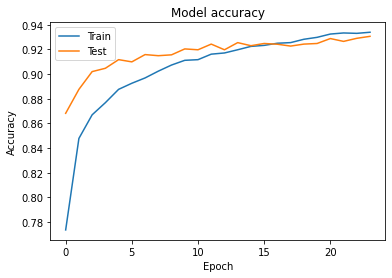

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Conclusion
To try a variety of times to get the best results the best prediction have with training accuracy: 0.9355 and test accuracy: 0.9306. 
Then we will predict the test and analyze the errors

Make the predictions

In [38]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

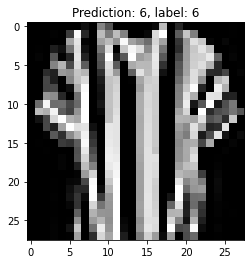

In [57]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

Error analysis

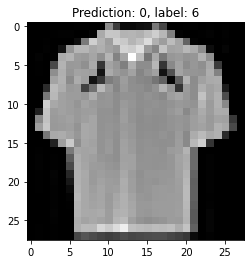

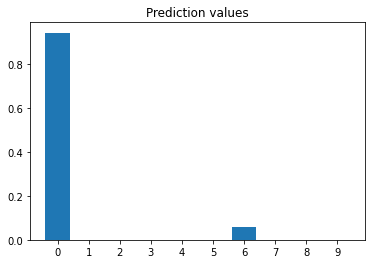

In [55]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

It is more difficult because the different colours can influence on the result and there are clothes that you see and it makes it difficult to identify

```
# Tiene formato de código
```

